# Livrable 1 : Modélisation 

Équipe 2 : MALONDO Emmanuel, KURRIMBOCCUS Anya, FIET Jordan, PILLON Antoine, LECHATREUX Pierre

## Introduction 

 

L’ADEME (Agence de l’Environnement et de la Maîtrise de L’Energie) a lancé un appel à manifestation d’intérêt pour promouvoir la réalisation de démonstrateurs et d’expérimentation de nouvelles solutions de mobilité pour les personnes et les marchandises adaptées à différents types de territoires. Notre équipe a été mise en place par le CesiCDP pour répondre à l’appel de l’ADEME. 

CesiCDP est déjà bien implantée dans le domaine. Aidé de nombreux partenaires, elle a réalisé plusieurs études sur le thème de la Mobilité Multimodale Intelligente. Les nouvelles technologies de transport, plus économiques et moins polluantes ne sont pas sans poser de nouveaux défis notamment d’un point de vue de l’optimisation de la gestion des ressources. Mais ces problèmes de logistique du transport présentent un enjeu majeur pour l’avenir : ses applications sont nombreuses (distribution du courrier, livraison de produits, traitement du réseau routier, ramassage des ordures) et leur impact sur l’environnement peut être véritablement significatif. 

La mise en place de notre équipe suit l’enjeu visé par CesiCDP qui est d’obtenir de nouveaux marchés avec des financements très intéressants pour continuer à développer son activité. 

CesiCDP a décidé d’orienter son étude sur la gestion de tournées de livraison.





### Objectifs de ce livrable  

- Reformuler le problème de manière formelle 

- Modéliser le problème et le formuler mathématiquement

- Étudier les propriétés théoriques (complexité) 

- Produire un pseudo code

 

### Objectif de la mission 

 

Sur un réseau routier, nous devons calculer une tournée permettant de relier entre elles un sous-ensemble de villes, puis de revenir à son point de départ, de façon à minimiser la durée de la tournée. Les calculs que nous ferons devront prendre en compte la charge du trafique routier qui impactera le temps de la tournée.  

Pour finir, l’idée ici, est de proposer une méthode issue de la RO (Recherche Opérationnelle) pour générer une tournée de livraison correspondant à ce problème. 


# Contraintes

Concernant la tournée de livraison, nous devons prendre en compte certaines contraintes. 
Tout d'abord, nous avons choisi d'intégrer à notre problème la contrainte concernant le nombre k de camions disponibles simultanément.De plus, nous pouvons prendre en compte sa contrainte avancée indiquant que certains objets ne peuvent être livrés que par certains camions.
Ainsi, les espaces de solutions pourra être restreint car certaines solutions seront invalidées.

## Données 

 

Pour répondre à l’appel de L’ADEME, nous avons identifié certaines données qui vont nous aider : 

 

- Nombre n de points. Les points sont ici les points de livraisons que nous avons à parcourir. Pour ce projet, nous avons décidé de placer un point de livraison par ville. Ces villes sont récupérables grâce à des cartographies existantes. 

- Les arêtes entre chaque point. Ceci correspond aux trajets permettant de se rendre d’une ville de départ à une ville d’arrivée. 

- Charge des arêtes. La charge des arêtes, correspond dans notre cas, au temps de trajet entre deux villes. 

- Nombre k de camions déployés. Cela correspond au nombre de camions en circulation permettant de délivrer les objets à déposer. 

- Durée d de la tournée. Cela correspond au temps pris par k camions pour que tous les points de livraison soient parcourus puis pour que les camions reviennent au point de départ. Cela correspond aussi à la somme des charges des arrêtes parcourues pendant la tournée. 

# Modélisation du problème



L’objectif de notre mission et les données à notre disposition nous permettent de délimiter le problème qui devra être résolu à l’aide de l’algorithme que l’on concevra. 

Pour cela, nous pouvons représenter le problème à l'aide d'un graphe. Ici, nous avons choisi de représenter les grandes villes de France et de les relier entre les 4 villes les plus proches de chacune. Ainsi, nous aurons une représentation plus réaliste, et le graphe ne sera donc pas complet. Le point vert de Rouen représente le point de départ et d'arrivée.
Voici ci-dessous cet exemple de modélisation :

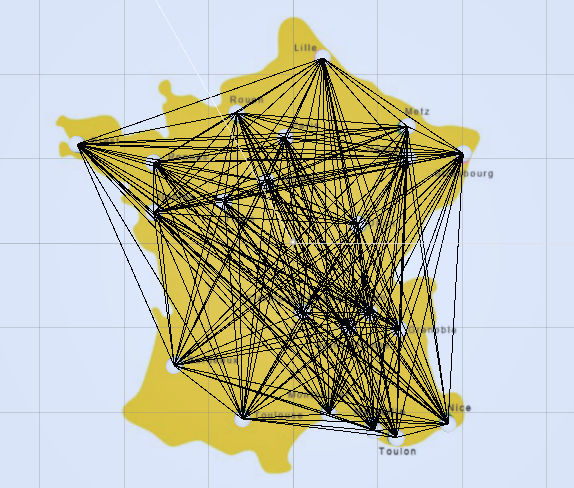





Cette représentation sous forme de graphe sur une carte n'est pas utilisable telle quelle par un algorithme. Il va donc falloir modéliser ce graphe sous une représentation adaptée pour notre mission.

Il existe 3 représentations possibles d'un graphe sous une forme utilisable par un algorithme: 
- Liste d'arêtes(edge list)
- Liste d'adjacence(adjacency list)
- Matrice d'adjacence(adjacency matrix)

###### Liste d'arrêtes
La liste d'arêtes représente chaque arête du graphe avec le sommet de départ suivi du sommet d'arrivée, tel que : 
Si on a un graphe non-orienté composé de deux sommets tout deux reliés par une arête, la liste d'arête du graphe sera la suivante :

$ A \rightarrow B$

$ B \rightarrow A$

Ce type de représentation peut vite devenir lourd en mémoire quand on manipule des graphes de plus en plus denses. Dans le cas du graphe avec les grandes villes de France que l'on a utilisé plus haut, le nombre d'arête est déjà très conséquent, ce mode de représentation n'est donc pas idéal dans les cas que l'on va aborder avec cette mission. 

###### Liste d'adjancence
La liste d'adjacence

# Formulation mathématique du problème

Données : 

Soit un graphe G non orienté G = (S, A) où :

- <b>S</b> un ensemble dont les éléments sont les sommets n du graphe G
- <b>A</b> un sous-ensemble A dont les éléments, les arêtes du graphe, sont des parties à un ou deux éléments de S.
 

### Problème de décision :  


Soit <b>t</b>, un temps établi arbitrairement. 
Soit <b>C</b>, un chemin déterminé par notre algorithme. 

<b>Existe-t-il un chemin C passant par chaque point une seule fois, puis revenant au point de départ, pour lequel la durée d est inférieure à t ?</b>
 

Notre algorithme devra être capable de déterminer un chemin C pour lequel la réponse au problème de décision est ‘oui’.  
 
Mais, il devra aussi être capable de déterminer le chemin C ayant la durée d la plus petite possible. Cela nous permet donc d’énoncer le problème d’optimisation ci-dessous. 

### Problème d’optimisation :  
			 

Quelle est la plus petite valeur de d pour laquelle la réponse au problème de décision émis est oui ?


# Étude de la complexité du problème

Après analyse du contexte de ce projet, nous pouvons remarquer qu'il ressemble au problème du voyageur de commerce. Le but est de réaliser un parcours de points le plus rapidement possible (de manière optimisée) tout en passant une fois et une seule fois seulement par chaque point.

En prenant ce problème comme base, il est possible de l’étendre à celui de la tournée de véhicules aussi appelé VRP pour "Vehicle Routing Problem". Il s’agit cette fois-ci de déterminer les tournées de plusieurs véhicules simultanément afin de visiter une liste de clients, ce qui correspond à l'ajout de notre contrainte. De la même manière que pour le problème du voyageur de commerce, le VRP appartient aux problèmes de la classe de complexité dit <b>NP-Complet</b>, autrement dit il est à la fois NP et NP-Difficile.

https://dial.uclouvain.be/memoire/ucl/en/object/thesis%3A17209/datastream/PDF_01/view#:~:text=Le%20VRP%2C%20et%20les%20deux,des%20probl%C3%A8mes%20dits%20NP%2Dcomplets

Comme pour la plupart des problèmes NP-complet, il est difficile de résoudre des instances de grande taille de manière optimale. Ce qui signifie que les seules solutions déterminables seront approximatives. 
Dans l'optique d'obtenir des solutions dans des temps de calculs raisonnables et exploitables, nous devons nous tourner vers des méthodes approchées à base de méta-heuristiques. Ces méthodes de calcul nous permettrons d'atteindre une solution approchée, comme pour ce genre de problème, et non une solution pour un problème particulier qui se rapproche plus de l'utilisation des heuristiques.

https://www.enseignement.polytechnique.fr/informatique/INF423/uploads/Main/chap12-good.pdf

## Comparaison des métaheuristiques


Tout d'abord, nous avons vu précedemment que notre problème de voyageur de commerce s'apparente plus à un problème de tournées de véhicules, et que ce type de problème et ses variantes peut être résolu car à des méta-heuristiques.
Il existe plusieurs type de métaheuristiques. Nous pouvons comparer les principales et sélectionner celle qui nous semble être la plus pertinente.

### Recuit simulé

# Bibliographie

- VRP : https://homepages.laas.fr/sungueve/Docs/PhD/These_SUNGUEVEU_20062009.pdf
- https://madhu.seas.harvard.edu/papers/2010/pnp.pdf 
- https://www.sciencedirect.com/topics/mathematics/computational-problem 
- https://www.seh.ox.ac.uk/blog/an-introduction-to-research-in-computational-complexity-theory 